# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import HouseholdSpecializationModelClass

# Question 1

We solve the model by looping over the choice set for $L_M,H_M,L_F,H_F$, and finding the set of choices, which maximizes the utility of the household. Given the parameters and constraints placed on individual hours and total hours worked by each individual in the household.

In [2]:
# setting up household
model = HouseholdSpecializationModelClass()

par = model.par
sol = model.sol

# creating arrays for alpha and sigma
alpha_vec = np.array([0.25,0.50,0.75])
sigma_vec = np.array([0.5,1,1.5])

# creating array to store results
out = np.zeros((len(alpha_vec),len(sigma_vec)))

# looping over different values of alpha and sigma, and for each iteration calculating the ratio of HF to HM
for i_a, a in enumerate(alpha_vec):
    for i_s ,s in enumerate(sigma_vec):
        
        opt = model.solve_discrete(alpha=a,sigma=s)
        
        out[i_a,i_s]=opt.HF/opt.HM

/Users/madsthorndahl/Documents/GitHub/projects-2023-f-m-r-23/inauguralproject/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))


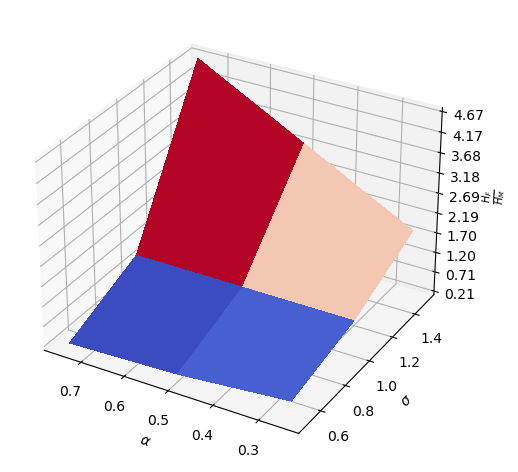

In [3]:
fig, ax = plt.subplots(dpi=100,subplot_kw={"projection": "3d"},figsize=(6,6))

# order data
X = alpha_vec = np.array([0.25,0.50,0.75])
Y = sigma_vec = np.array([0.5,1,1.5])
X, Y = np.meshgrid(X, Y)
Z = out

# plot
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# customize z-axis
ax.set_zlim(np.min(out), np.max(out))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_ylabel('$\sigma$')
ax.set_xlabel(r'$\alpha$')
ax.set_zlabel(r'$\frac{H_F}{H_M}$',rotation=180)
ax.invert_xaxis()

plt.show()

We see that when $\alpha$ is small it does not affect $\sigma$ significant but $\alpha$ affects $\frac{H_F}{H_M}$ more. The higher $\alpha$ the higher $\frac{H_F}{H_M}$. The same yields for the ratio between $\sigma$ and $\frac{H_F}{H_M}$. $\alpha$ is the productivity and as alpha becomes higher, it yields that the women are more productive at home. 

# Question 2

For documentation of ```solve_wF_vec``` see ```inaguralproject.py```. The plot can be seen in Question 3

In [4]:
model.solve_wF_vec(discrete=True) # solves the model discretely for different values of wF
lH_vec_disc = par.lH_vec.copy()   # stores the results to plot later

# Question 3

Solves the model continuously for different values of wF

In [5]:
model.solve_wF_vec(discrete=False) # solves the model continuously for different values of wF
lH_vec_cont = par.lH_vec.copy()    # stores the results to plot later

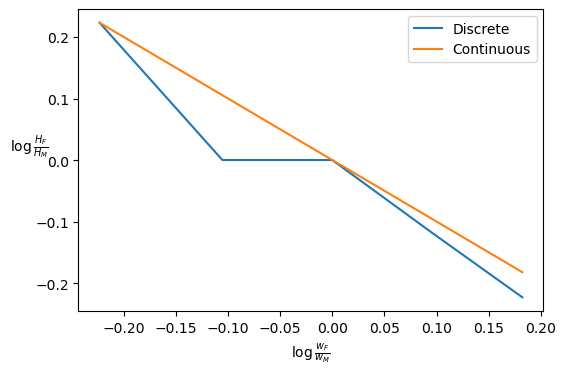

In [6]:
# Plotting the discrete and continuous model solutions

fig, ax = plt.subplots(dpi=100)

lw_vec = np.log(par.wF_vec/par.wM)

ax.plot(lw_vec,lH_vec_disc,label='Discrete')
ax.plot(lw_vec,lH_vec_cont,label='Continuous')
ax.set_ylabel(r'$\log\frac{H_F}{H_M}$',rotation=0)
ax.set_xlabel(r'$\log\frac{w_F}{w_M}$')

plt.legend()
plt.show()

We see the $\frac{H_F}{H_M}$ is linearly decreasing in the wages, when solving the problem continuously. This highlights the errors, when only solving the problem discretly, when the optimal solutions are between grid points.

# Question 4

For ```estimate``` see ```ìnaugural.py```. In short the function solves the following minimazation problem 

$\min_{\alpha,\sigma}(\beta_0-\hat{\beta}_0)^2 + (\beta_1-\hat{\beta}_1)^2$

In [7]:
model.estimate(do_print=True)

Optimization terminated successfully.
alpha_hat: 0.9820
sigma_hat: 0.1000
beta0_hat: 0.4000
beta1_hat: -0.1000
Termination value: 0.0000


We are able to match the the empirical estimates accurately. By setting a high $\alpha$ and a low $\sigma$. The first parameter implies females have a much higher home productivity, while $\sigma$ suggests that home production of males and females are close to perfect complements.

It should be noted, that the result of the ```Nelder-Mead``` algorithm is quite sensitive to the initial guess, suggesting multiple local minima. Either one could change the tolerance for convergence or try different initial guesses, we used the latter approach.

# Question 5

In this question, we add a dummy to the disutility of working only for women. Thus, the dummy represents extra disutility stemming from women working more in the workforce. This could for example be them working despite just giving birth to a child or other stereotypical deviations. Formally, we change the utility to:

$\frac{Q^{1-\rho}}{1-\rho}-\nu\bigg(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+ (LF)^{\mu}-1\bigg)$

And solve the following minimazztion problem

$\min_{\alpha,\mu}(\beta_0-\hat{\beta}_0)^2 + (\beta_1-\hat{\beta}_1)^2$

Note, that the original model is a special case of the extended model where $\mu=0$

In [8]:
par.alpha = 0.5

model.estimate_(do_print=True)
#For comments on the code we refer to the .py file

Optimization terminated successfully.
sigma_hat: 0.8856
mu_hat: 5.4139
beta0_hat: 0.4000
beta1_hat: -0.1000
Termination value: 0.0000


From the estiamtion above we see that $\mu$ is approximately 5, which indicates that they get exponential more disutility from working.

The extension allows us to match the empirical estimates, but $H_F$ is much lower than the solutions for the questions above.